<a href="https://colab.research.google.com/github/bharathulaprasad/cs360ml/blob/main/Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

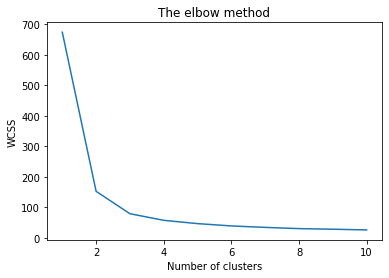

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
 
 
dataset = r'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data' # use your path
iris = pd.read_csv(dataset, index_col=None, header=0)
 
iris.columns=['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm', 'class']
iris_floats = iris[['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm']].iloc[: , :].values
#print(iris_floats)
 
from sklearn.cluster import KMeans
wcss = []
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(iris_floats)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(iris_floats)

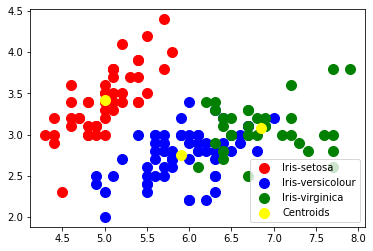

In [ ]:
plt.scatter(iris_floats[y_kmeans == 0, 0], iris_floats[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(iris_floats[y_kmeans == 1, 0], iris_floats[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(iris_floats[y_kmeans == 2, 0], iris_floats[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()
dbscan.fit(iris_floats.data)
print(dbscan)
# This results in eps 0.5
dbscan.labels_

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

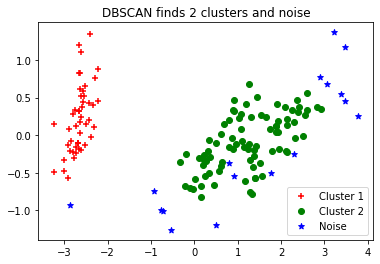

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as pl
pca = PCA(n_components=2).fit(iris_floats.data)

from sklearn.decomposition import PCA

pca_2d = pca.transform(iris_floats.data)
for i in range(0, pca_2d.shape[0]):
  if dbscan.labels_[i] == 0:
    c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',
    marker='+')
  elif dbscan.labels_[i] == 1:
    c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',
    marker='o')
  elif dbscan.labels_[i] == -1:
    c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',
    marker='*')
pl.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2',
    'Noise'])
pl.title('DBSCAN finds 2 clusters and noise');
pl.show()

In [ ]:
 
from copy import deepcopy
import numpy as np
import pandas as pd
import random

data = pd.read_csv(dataset) #reading from file
data.columns=['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm', 'class']
c1 = data['sepal length in cm'].values    
c2 = data['sepal width in cm'].values
c3 = data['petal length in cm'].values
c4 = data['petal width in cm'].values
X = np.array(list(zip(c1,c2,c3,c4)))
 
k=3                            
#no. of clusters (3 in the sample data)
 
c1 = [X[0][0],X[1][0],X[2][0]] 
#first feature cluster centroids
c2 = [X[0][1],X[1][1],X[2][1]] 
#second feature cluster centroids
c3 = [X[0][2],X[1][2],X[2][2]] 
#third feature cluster centroids
c4 = [X[0][3],X[1][3],X[2][3]] 
#fourth feature cluster centroids
 
# A better way to initialize cluster centroids would be the kmeans++ algorithm
 
c = np.array(list(zip(c1,c2,c3,c4)), dtype=np.float32)
print(c)
 
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)
# returns the vector norm of cluster centroids and the corresponding features
 
# Stores the centroid values, as they are updated, initialiased to zeros
c_old = np.zeros(c.shape)
# Stores the centroid nearest to the point
clusters = np.zeros(len(X))
# Stores the error at this stage, iteration runs till error becomes zero
error = dist(c,c_old,None)
while error!=0:
    # Assigning each point to its nearest cluster
    for i in range(len(X)):
        distances = dist(X[i],c)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Old centroid values stored in c_old 
    c_old = deepcopy(c)
    # Finding the new mean of each cluster
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        c[i] = np.mean(points, axis=0)
    error = dist(c, c_old, None)
    
print(c)
print(clusters)
print(error)

[[4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]]
[[6.853846   3.0769231  5.7153845  2.0538461 ]
 [5.0040817  3.4163265  1.4653062  0.24489796]
 [5.8836064  2.7409837  4.3885245  1.4344262 ]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 0. 2. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 2. 2. 0. 0. 0. 0. 2. 0.
 2. 0. 2. 0. 0. 2. 2. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 2. 0. 0. 0. 2. 0. 0.
 0. 2. 0. 0. 2.]
0.0
